This is my first exercise for bias detection....

In [1]:
!pip install aequitas 

     |████████████████████████████████| 2.2 MB 3.9 MB/s 
     |████████████████████████████████| 596 kB 51.8 MB/s 
     |████████████████████████████████| 727 kB 48.3 MB/s 
     |████████████████████████████████| 97 kB 6.8 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 456 kB 41.9 MB/s 
     |████████████████████████████████| 83 kB 1.3 MB/s 
     |████████████████████████████████| 161 kB 58.8 MB/s 
     |████████████████████████████████| 77 kB 3.4 MB/s 
     |████████████████████████████████| 2.7 MB 17.2 MB/s 
  Created wheel for Flask-Bootstrap: filename=Flask_Bootstrap-3.3.7.1-py3-none-any.whl size=460123 sha256=c06efdc0338d4829160995ff5ab68ce092420ff57dedcd378bd9c0f987572645
  Stored in directory: /root/.cache/pip/wheels/67/a2/d6/50d039c9b59b4caca6d7b53839c8100354a52ab7553d2456eb
  Created wheel for markdown2: filename=markdown2-2.3.5-py3-none-any.whl size=33327 sha256=d458ade9e6c55aa11c2953d2be70f88dfc8bfc319eb1447abd9fc7a716f7

In [2]:
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

# import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("https://github.com/dssg/aequitas/raw/master/examples/data/compas_for_aequitas.csv")
df.head(10)

,entity_id,score,label_value,race,sex,age_cat
0,1,0.0,0,Other,Male,Greater than 45
1,3,0.0,1,African-American,Male,25 - 45
2,4,0.0,1,African-American,Male,Less than 25
3,5,1.0,0,African-American,Male,Less than 25
4,6,0.0,0,Other,Male,25 - 45
5,7,0.0,0,Other,Male,25 - 45
6,8,1.0,1,Caucasian,Male,25 - 45
7,9,0.0,0,Other,Male,25 - 45
8,10,0.0,0,Caucasian,Female,25 - 45
9,13,0.0,1,Caucasian,Male,Less than 25


In [4]:
df.shape

(7214, 6)

In [5]:
aq_palette = sns.diverging_palette(225, 35, n=2)

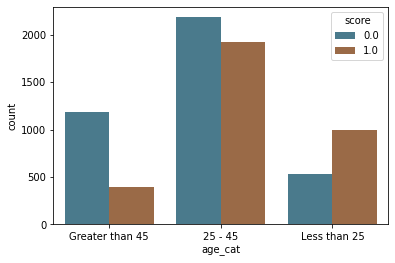

In [6]:
by_age = sns.countplot(x="age_cat", hue="score", data=df, palette=aq_palette)

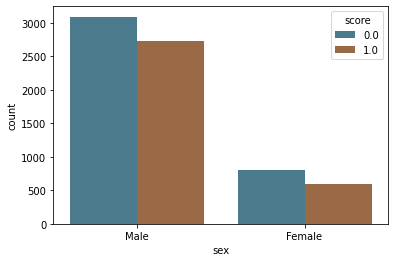

In [7]:
by_sex = sns.countplot(x="sex", hue="score", data=df, palette=aq_palette)

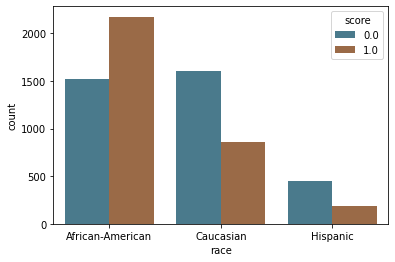

In [9]:
by_race = sns.countplot(x="race", hue="score", data=df[df.race.isin(['African-American', 'Caucasian', 'Hispanic'])], palette=aq_palette)

Other fairness metrics I could use.....

In [10]:
g = Group()
xtab, _ = g.get_crosstabs(df)

In [11]:
absolute_metrics = g.list_absolute_metrics(xtab)

In [12]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,3317,race,African-American,2174,1522,805,532,990,1369,1901,1795,3696,7214
1,0,binary 0/1,3317,race,Asian,8,24,2,3,21,6,9,23,32,7214
2,0,binary 0/1,3317,race,Caucasian,854,1600,349,461,1139,505,966,1488,2454,7214
3,0,binary 0/1,3317,race,Hispanic,190,447,87,129,318,103,232,405,637,7214
4,0,binary 0/1,3317,race,Native American,12,6,3,1,5,9,10,8,18,7214
5,0,binary 0/1,3317,race,Other,79,298,36,90,208,43,133,244,377,7214
6,0,binary 0/1,3317,sex,Female,591,804,288,195,609,303,498,897,1395,7214
7,0,binary 0/1,3317,sex,Male,2726,3093,994,1021,2072,1732,2753,3066,5819,7214
8,0,binary 0/1,3317,age_cat,25 - 45,1924,2185,741,706,1479,1183,1889,2220,4109,7214
9,0,binary 0/1,3317,age_cat,Greater than 45,394,1182,181,285,897,213,498,1078,1576,7214


In [13]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,race,African-American,0.72,0.55,0.35,0.37,0.45,0.28,0.65,0.63,0.66,0.59,0.51
1,race,Asian,0.67,0.91,0.12,0.25,0.09,0.33,0.88,0.75,0.00,0.25,0.28
2,race,Caucasian,0.52,0.77,0.29,0.41,0.23,0.48,0.71,0.59,0.26,0.35,0.39
3,race,Hispanic,0.44,0.79,0.29,0.46,0.21,0.56,0.71,0.54,0.06,0.30,0.36
4,race,Native American,0.90,0.62,0.17,0.25,0.38,0.10,0.83,0.75,0.00,0.67,0.56
5,race,Other,0.32,0.85,0.30,0.46,0.15,0.68,0.70,0.54,0.02,0.21,0.35
6,sex,Female,0.61,0.68,0.24,0.49,0.32,0.39,0.76,0.51,0.18,0.42,0.36
7,sex,Male,0.63,0.68,0.33,0.36,0.32,0.37,0.67,0.64,0.82,0.47,0.47
8,age_cat,25 - 45,0.63,0.67,0.32,0.39,0.33,0.37,0.68,0.61,0.58,0.47,0.46
9,age_cat,Greater than 45,0.43,0.83,0.24,0.46,0.17,0.57,0.76,0.54,0.12,0.25,0.32


In [14]:
b = Bias()

In [15]:
bdf = b.get_disparity_predefined_groups(xtab, original_df=df, 
                                        ref_groups_dict={'race':'Caucasian', 'sex':'Male', 'age_cat':'25 - 45'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
bdf.style

get_disparity_predefined_group()


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,3317,race,African-American,0.720147,0.551532,0.349540,0.370285,0.448468,0.279853,0.650460,0.629715,2174,1522,0.655412,0.588203,805,532,990,1369,1901,1795,3696,7214,0.514340,True,True,0.906085,Caucasian,False,0.586416,Caucasian,True,1.213154,Caucasian,True,1.912093,Caucasian,False,0.913728,Caucasian,True,2.545667,Caucasian,True,1.690224,Caucasian,True,1.064904,Caucasian,False,0.720526,Caucasian,False,1.377549,Caucasian,True
1,0,binary 0/1,3317,race,Asian,0.666667,0.913043,0.125000,0.250000,0.086957,0.333333,0.875000,0.750000,8,24,0.002412,0.250000,2,3,21,6,9,23,32,7214,0.281250,False,False,0.611748,Caucasian,False,0.698482,Caucasian,False,0.433839,Caucasian,False,0.370749,Caucasian,False,1.229148,Caucasian,False,0.009368,Caucasian,False,0.718384,Caucasian,False,1.268317,Caucasian,False,1.192808,Caucasian,False,1.275248,Caucasian,False
2,0,binary 0/1,3317,race,Caucasian,0.522774,0.765457,0.288125,0.408665,0.234543,0.477226,0.711875,0.591335,854,1600,0.257462,0.348003,349,461,1139,505,966,1488,2454,7214,0.393643,False,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False,1.000000,Caucasian,False
3,0,binary 0/1,3317,race,Hispanic,0.443966,0.785185,0.288591,0.457895,0.214815,0.556034,0.711409,0.542105,190,447,0.057281,0.298273,87,129,318,103,232,405,637,7214,0.364207,False,True,1.120464,Caucasian,False,1.165140,Caucasian,False,1.001616,Caucasian,False,0.915887,Caucasian,False,0.999346,Caucasian,False,0.222482,Caucasian,True,0.857099,Caucasian,True,0.916748,Caucasian,False,1.025773,Caucasian,False,0.849249,Caucasian,False
4,0,binary 0/1,3317,race,Native American,0.900000,0.625000,0.166667,0.250000,0.375000,0.100000,0.833333,0.750000,12,6,0.003618,0.666667,3,1,5,9,10,8,18,7214,0.555556,False,True,0.611748,Caucasian,False,0.209544,Caucasian,False,0.578453,Caucasian,False,1.598854,Caucasian,False,1.170618,Caucasian,False,0.014052,Caucasian,True,1.915691,Caucasian,True,1.268317,Caucasian,False,0.816506,Caucasian,False,1.721584,Caucasian,False
5,0,binary 0/1,3317,race,Other,0.323308,0.852459,0.302013,0.455696,0.147541,0.676692,0.697987,0.544304,79,298,0.023817,0.209549,36,90,208,43,133,244,377,7214,0.352785,False,True,1.115085,Caucasian,False,1.417970,Caucasian,False,1.048203,Caucasian,False,0.629057,Caucasian,False,0.980490,Caucasian,False,0.092506,Caucasian,True,0.602147,Caucasian,True,0.920466,Caucasian,False,1.113660,Caucasian,False,0.618447,Caucasian,False
6,0,binary 0/1,3317,sex,Female,0.608434,0.678930,0.242537,0.487310,0.321070,0.391566,0.757463,0.512690,591,804,0.178173,0.423656,288,195,609,303,498,897,1395,7214,0.356989,True,True,1.336425,Male,True,1.055810,Male,True,0.734738,Male,True,0.990343,Male,True,1.130710,Male,True,0.216801,Male,True,0.904348,Male,True,0.806925,Male,True,1.004633,Male,True,0.967101,Male,True
7,0,binary 0/1,3317,sex,Male,0.629132,0.675799,0.330100,0.364637,0.324201,0.370868,0.669900,0.635363,2726,3093,0.821827,0.468465,994,1021,2072,1732,2753,3066,5819,7214,0.473105,False,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000,Male,False,1.000000

In [16]:
# View disparity metrics added to dataframe
bdf[['attribute_name', 'attribute_value'] +
     b.list_disparities(bdf) + b.list_significance(bdf)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,race,African-American,0.906085,0.586416,1.213154,1.912093,0.913728,2.545667,1.690224,1.064904,0.720526,1.377549,True,True,False,True,True,False,True,True,True,False,False,True
1,race,Asian,0.611748,0.698482,0.433839,0.370749,1.229148,0.009368,0.718384,1.268317,1.192808,1.275248,False,False,False,False,False,False,False,False,False,False,False,False
2,race,Caucasian,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
3,race,Hispanic,1.120464,1.165140,1.001616,0.915887,0.999346,0.222482,0.857099,0.916748,1.025773,0.849249,False,True,False,False,False,False,False,True,True,False,False,False
4,race,Native American,0.611748,0.209544,0.578453,1.598854,1.170618,0.014052,1.915691,1.268317,0.816506,1.721584,False,True,False,False,False,False,False,True,True,False,False,False
5,race,Other,1.115085,1.417970,1.048203,0.629057,0.980490,0.092506,0.602147,0.920466,1.113660,0.618447,False,True,False,False,False,False,False,True,True,False,False,False
6,sex,Female,1.336425,1.055810,0.734738,0.990343,1.130710,0.216801,0.904348,0.806925,1.004633,0.967101,True,True,True,True,True,True,True,True,True,True,True,True
7,sex,Male,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
8,age_cat,25 - 45,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,False,False,False,False,False,False,False,False,False,False
9,age_cat,Greater than 45,1.192804,1.531238,0.746232,0.503031,1.121136,0.204782,0.533914,0.879232,1.248989,0.682963,True,True,True,True,True,True,True,True,True,True,True,True


In [17]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [18]:
ap.summary(bdf, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [19]:
ap.disparity(bdf, metrics, 'race', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [20]:
ap.absolute(bdf, metrics, 'race', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)